**Library Imports**

In [2]:
import pandas
import numpy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown

**Importing Iris Dataset**

In [3]:
data = pandas.read_excel('iris.xlsx', "iris")

Our data has 5 columns. The first 4 being the features and the 5th being the labels. The features have a data type of float64 and the labels are a string object. We will attempt to create a model which will determine how to classify the features to a certain variety of flower.

In [4]:
data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

Since the "variety" column will be our labels, this will be the models output. Each label will be given a numerical label using the LabelEncoder class of sklearn

In [5]:
label_data = data["variety"]
encoder = sklearn.preprocessing.LabelEncoder()
encoder.fit(label_data)
label_names = encoder.classes_
y = encoder.transform(label_data)

#Creating a lookup table to map the prediction output to the name of the label
label_mapping = dict(zip(label_names, encoder.transform(label_names)))
label_mapping

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

Our inputs to the model will be the features of the dataset, i.e. sepal.length, sepal.width, petal.length, petal.width

In [6]:
x = data.iloc[:, :-1]
x

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Splitting Data into Train and Test data** \
The dataset will be split into train and test data using scikit learn's *train_test_split* functiion. The training data will be split into 65% of the original dataset and the test data will be the remaining 35%.\
We will be using the Hold Out method by holding out 35% of the data for testing/validation.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
print("X Train Size:", X_train.shape)
print("X Test Size:", X_test.shape)
print("y Train Size:", y_train.shape)
print("y Test Size:", y_test.shape)

X Train Size: (97, 4)
X Test Size: (53, 4)
y Train Size: (97,)
y Test Size: (53,)


Normalizing the data using the StandardScaler function of sklearn

In [8]:
normalize = StandardScaler()
normalize.fit(X_train)
X_train = normalize.transform(X_train)
X_test = normalize.transform(X_test)

**Scatter Plots** 

Sepal length vs. width

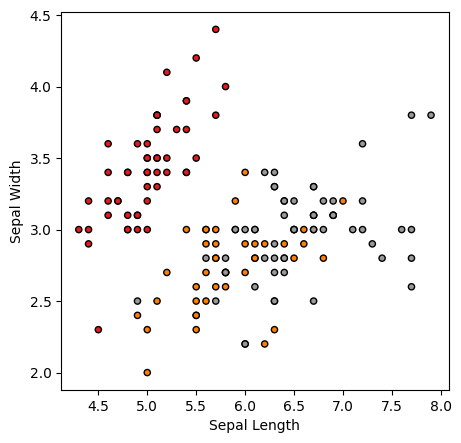

In [9]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(x['sepal.length'], x['sepal.width'], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Petal length vs. width

No handles with labels found to put in legend.


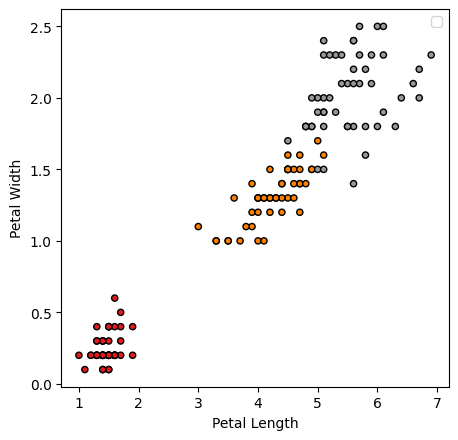

In [10]:
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(x['petal.length'], x['petal.width'], c=y, cmap=plt.cm.Set1, edgecolor='k', s=20)
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


**KNN Classifier**\
KNN Classifier with default distance metric (Minkowski)

In [11]:
k = 5
for k in range(1, 25):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    prediction = knn_classifier.predict(X_test)
    model_accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
    print("The model accuracy when metric is " + knn_classifier.metric +" and k = " + str(k) + " is: " + str(model_accuracy*100) + "%")

#Cross validation scores
scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print(scores)
#Testing with random feature values. The for loop maps the output prediction array to the name of the label
random_test_data = [[5.25,5.25,5.25,0.25], [6.3,3.3,6,2.6]]
i = 0
for item in knn_classifier.predict(random_test_data):
    for types in label_mapping.items():
        if item == types[1]:
            print("The type of iris when data is " + str(random_test_data[i]) + ": " + types[0])
    i = i + 1


The model accuracy when metric is minkowski and k = 1 is: 96.22641509433963%
The model accuracy when metric is minkowski and k = 2 is: 96.22641509433963%
The model accuracy when metric is minkowski and k = 3 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 4 is: 96.22641509433963%
The model accuracy when metric is minkowski and k = 5 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 6 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 7 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 8 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 9 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 10 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 11 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 12 is: 98.11320754716981%
The model accuracy when metric is minkowski and k = 13 is: 98.11320754716

**KNN Classifier**\
Since our input data is in a real valued space, we will use two real valued distance metrics. Manhattan and Euclidean Distances. 
<br>
KNN Classifier model for multiple values of K in the range of 1 to 25:
- Using Manhattan Distance Criteria. i.e *p = 1* 


In [12]:
manhattan_accuracies = {}
for k in range(1, 66):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn_classifier.fit(X_train, y_train)
    prediction = knn_classifier.predict(X_test)
    model_accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
    print("The model accuracy when metric is Manhattan and k = " + str(k) + " is: " + str(model_accuracy*100) + "%")
    manhattan_accuracies[k] = model_accuracy*100

#Testing with random feature values. The for loop maps the output prediction array to the name of the label
random_test_data = [[5.25,5.25,5.25,0.25], [6.3,3.3,6,2.6]]
i = 0
for item in knn_classifier.predict(random_test_data):
    for types in label_mapping.items():
        if item == types[1]:
            print("The type of iris when data is " + str(random_test_data[i]) + ": " + types[0])
    i = i + 1

The model accuracy when metric is Manhattan and k = 1 is: 94.33962264150944%
The model accuracy when metric is Manhattan and k = 2 is: 92.45283018867924%
The model accuracy when metric is Manhattan and k = 3 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 4 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 5 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 6 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 7 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 8 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 9 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 10 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 11 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 12 is: 98.11320754716981%
The model accuracy when metric is Manhattan and k = 13 is: 98.11320754716

**KNN Classifier**\
KNN Classifier model for multiple values of K in the range of 1 to 25:
- Using Euclidean Distance Criteria. i.e *p = 2* 

In [13]:
euclidean_accuracies = {}
for k in range(1, 66):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_classifier.fit(X_train, y_train)
    prediction = knn_classifier.predict(X_test)
    model_accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
    print("The model accuracy when metric is Euclidean and k = " + str(k) + " is: " + str(model_accuracy*100) + "%")
    euclidean_accuracies[k] = model_accuracy*100

#Testing with random feature values. The for loop maps the output prediction array to the name of the label
random_test_data = [[5.25,5.25,5.25,0.25], [6.3,3.3,6,2.6]]
i = 0
for item in knn_classifier.predict(random_test_data):
    for types in label_mapping.items():
        if item == types[1]:
            print("The type of iris when data is " + str(random_test_data[i]) + ": " + types[0])
    i = i + 1
k_tests = [5, 30]

Markdown("**Selecting two values of K: %s** <br><br> For **k = %s**, the accuracy is %s when metric is Manhattan <br> For **k = %s**, the accuracy is %s when metric is Euclidean" % (k_tests, k_tests[0], manhattan_accuracies[k_tests[0]], k_tests[0], euclidean_accuracies[k_tests[0]]))

The model accuracy when metric is Euclidean and k = 1 is: 96.22641509433963%
The model accuracy when metric is Euclidean and k = 2 is: 96.22641509433963%
The model accuracy when metric is Euclidean and k = 3 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 4 is: 96.22641509433963%
The model accuracy when metric is Euclidean and k = 5 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 6 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 7 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 8 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 9 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 10 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 11 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 12 is: 98.11320754716981%
The model accuracy when metric is Euclidean and k = 13 is: 98.11320754716

**Selecting two values of K: [5, 30]** <br><br> For **k = 5**, the accuracy is 98.11320754716981 when metric is Manhattan <br> For **k = 5**, the accuracy is 98.11320754716981 when metric is Euclidean

In [14]:
cosine_accuracies = {}
for k in range(1, 66):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn_classifier.fit(X_train, y_train)
    prediction = knn_classifier.predict(X_test)
    model_accuracy = sklearn.metrics.accuracy_score(y_test, prediction)
    print("The model accuracy when metric is Euclidean and k = " + str(k) + " is: " + str(model_accuracy*100) + "%")
    cosine_accuracies[k] = model_accuracy*100


The model accuracy when metric is Euclidean and k = 1 is: 86.79245283018868%
The model accuracy when metric is Euclidean and k = 2 is: 84.90566037735849%
The model accuracy when metric is Euclidean and k = 3 is: 90.56603773584906%
The model accuracy when metric is Euclidean and k = 4 is: 86.79245283018868%
The model accuracy when metric is Euclidean and k = 5 is: 83.01886792452831%
The model accuracy when metric is Euclidean and k = 6 is: 84.90566037735849%
The model accuracy when metric is Euclidean and k = 7 is: 86.79245283018868%
The model accuracy when metric is Euclidean and k = 8 is: 84.90566037735849%
The model accuracy when metric is Euclidean and k = 9 is: 83.01886792452831%
The model accuracy when metric is Euclidean and k = 10 is: 84.90566037735849%
The model accuracy when metric is Euclidean and k = 11 is: 81.13207547169812%
The model accuracy when metric is Euclidean and k = 12 is: 83.01886792452831%
The model accuracy when metric is Euclidean and k = 13 is: 84.90566037735

In [15]:
Markdown("**Selecting two values of K: %s** <br><br> For **k = %s**, the accuracy is %s when metric is Manhattan <br> For **k = %s**, the accuracy is %s when metric is Euclidean" % (k_tests, k_tests[1], manhattan_accuracies[k_tests[1]], k_tests[1], euclidean_accuracies[k_tests[1]]))

**Selecting two values of K: [5, 30]** <br><br> For **k = 30**, the accuracy is 94.33962264150944 when metric is Manhattan <br> For **k = 30**, the accuracy is 88.67924528301887 when metric is Euclidean

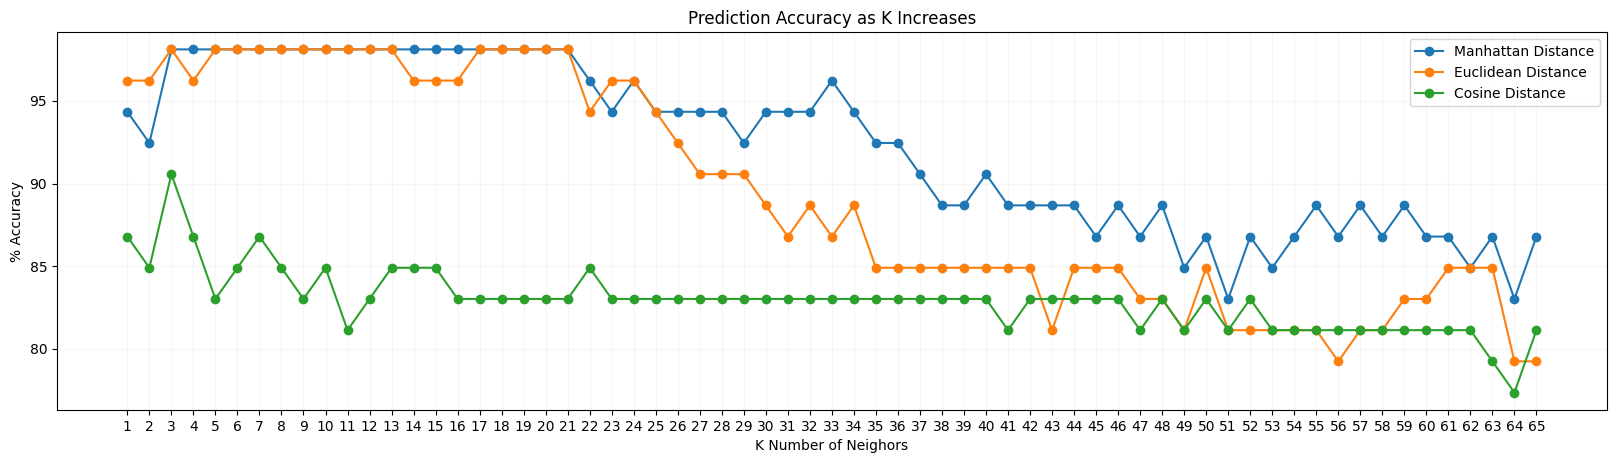

In [16]:
plt.figure(figsize=(20,5), dpi=100)
# plt=plt.figure(figsize=(20,8), dpi=100)
plt.plot(manhattan_accuracies.keys(), manhattan_accuracies.values(), '-o', label="Manhattan Distance")
plt.plot(euclidean_accuracies.keys(), euclidean_accuracies.values(), '-o', label="Euclidean Distance")
plt.plot(cosine_accuracies.keys(), cosine_accuracies.values(), '-o', label="Cosine Distance")
plt.legend()
plt.xlabel('K Number of Neighors')
plt.ylabel('% Accuracy')
plt.xticks(list(euclidean_accuracies.keys()))
plt.title('Prediction Accuracy as K Increases')
plt.grid(alpha=0.1)
# plt.figure(figsize=(20,8), dpi=100)
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [30,10]
plt.show()

**Interpreting the Accuracy vs. K Number of Neighbors Plot**\
From the above plot, we can see that as the K value increases, the accuracy decreases. 
Comparing the accuracy of the two values of K (5, 30) with two different distance criteria, namely the Manhattan and the Cosine distance measures, we can see that the accuracy is high when K = 5 and the accuracy drops when K = 30. Manhattan and Euclidean criterias evaluate very similar accuracies while the accuracy drops significantly when the Cosine criteria is used. At K = 5, Manhattan and Cosine measures vary by almost 15% in accuracy. When K = 30, the accuracy decreases for all the criteria's and we can see that there is a slight variance between the Manhattan, Euclidean and Cosine distance criteria's. The Manhattan distance criteria seems to have the overall highest accuracy in this dataset. As the K value approaches 50, the accuracy drops significantly since we only have 50 samples per class of iris in our dataset. At this point the large value of K will over-smooth the model fit and any local structure will be ignored. The Manhattan distance performs the best since it works better than Euclidean distances and cosine distance as the dimension of the data increases. \
Reference: https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7